In [1]:
import torch
from diffusers import StableDiffusion3Pipeline
import PIL.Image

In [2]:
model_id = "stabilityai/stable-diffusion-3-medium-diffusers"
pipe = StableDiffusion3Pipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

StableDiffusion3Pipeline {
  "_class_name": "StableDiffusion3Pipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "stabilityai/stable-diffusion-3-medium-diffusers",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "text_encoder_3": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_3": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "SD3Transformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/100 [00:00<?, ?it/s]

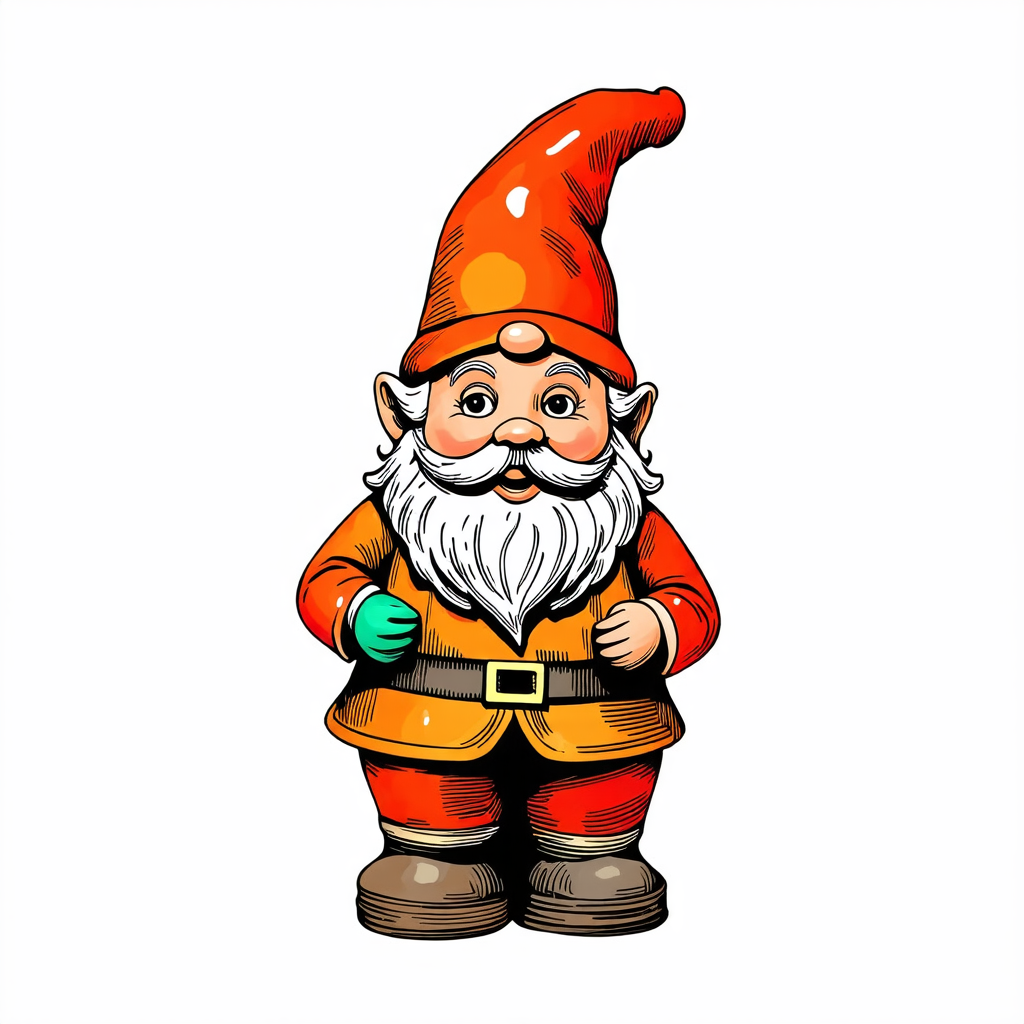

In [17]:
image = pipe(
    """
       A beautifully hand-drawn garden gnome decoration in a whimsical illustrated style.
       The lines are slightly sketchy with smooth, painterly textures, evoking a warm and artistic aesthetic. The colors are vibrant yet slightly soft, blending like traditional colored pencil or watercolor artwork.
       The background is plain white for product display.
    """,
    negative_prompt="",
    num_inference_steps=100,
    guidance_scale=8,
).images[0]
image